In [1]:
import torch
import os
import soundfile
from scipy.signal import resample
import librosa
from nnAudio import Spectrogram
import matplotlib.pyplot as plt

os.environ['CUDA_VISIBLE_DEVICES'] = '3'
from evaluate import *

if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

STFT filter created, time used = 0.2062 seconds
Mel filter created, time used = 0.0051 seconds


In [7]:
os.listdir('./runs/model2')

['model-500.pt',
 'model-900.pt',
 'model-750.pt',
 'model-450.pt',
 'model-1700.pt',
 'model-1250.pt',
 'model-1600.pt',
 'model-1450.pt',
 'model-1900.pt',
 'model-350.pt',
 'model-700.pt',
 'model-850.pt',
 'model-950.pt',
 'model-100.pt',
 'model-1950.pt',
 'model-650.pt',
 'model-1000.pt',
 'model-250.pt',
 'model-50.pt',
 'model-550.pt',
 'last-optimizer-state.pt',
 'model-1100.pt',
 'model-1500.pt',
 'model-1800.pt',
 'model-150.pt',
 'model-1750.pt',
 'model-1400.pt',
 'model-800.pt',
 '1',
 'model-2000.pt',
 'model-1850.pt',
 'model-1200.pt',
 'model-1650.pt',
 'model-600.pt',
 'model-1050.pt',
 'model-1550.pt',
 '_sources',
 'model-300.pt',
 'model-1300.pt',
 'events.out.tfevents.1578546570.debb4f54d1a6.23844.0',
 'model-1150.pt',
 'model-1350.pt',
 'model-400.pt',
 'model-200.pt']

In [8]:
model = 'model2'
model_file = os.path.join('./runs',model,'model-2000.pt')
dataset = 'MAPS'
dataset_group = None
save_path = os.path.join('results',model)
sequence_length = None
onset_threshold = 0.5
frame_threshold = 0.5
device = 'cuda:0'

In [9]:
model = torch.load(model_file, map_location=device)

In [10]:
summary(model)

OnsetsAndFrames(
  (onset_stack): Sequential(
    (0): ConvStack(
      (cnn): Sequential(
        (0): Conv2d(1, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 480 params
        (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 96 params
        (2): ReLU(), 0 params
        (3): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 20,784 params
        (4): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 96 params
        (5): ReLU(), 0 params
        (6): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False), 0 params
        (7): Dropout(p=0.25, inplace=False), 0 params
        (8): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 41,568 params
        (9): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 192 params
        (10): ReLU(), 0 params
        (11): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), paddin

26220920

In [11]:
audio_path = './test_audio/1759.wav'

In [12]:
audio, sr = librosa.load(audio_path, sr=16000)

In [13]:
audio = torch.tensor(audio).to(device)

In [14]:
melspectrogram = Spectrogram.MelSpectrogram(SAMPLE_RATE, WINDOW_LENGTH, N_MELS, HOP_LENGTH,
                                            fmin=MEL_FMIN, fmax=MEL_FMAX, trainable_mel=True, device=DEFAULT_DEVICE)

STFT filter created, time used = 0.1924 seconds
Mel filter created, time used = 0.0050 seconds


In [15]:
mel = melspectrogram(audio)

In [16]:
mel = mel.transpose(-1,-2)

In [17]:
onset_pred, activation_pred, frame_pred = model(mel)

In [18]:
frame_pred.shape

torch.Size([1, 12167, 88])

In [19]:
frame_pred.T.shape

torch.Size([88, 12167, 1])

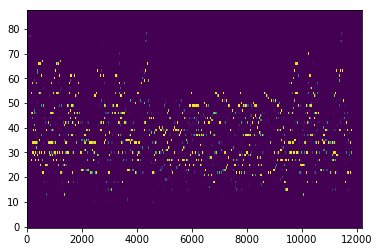

In [20]:
plt.imshow(frame_pred.detach().cpu()[0].T, origin='lower', aspect='auto')

In [21]:
import pandas as pd
from evaluate import extract_notes_wo_velocity

In [22]:
os.listdir('./data/MAPS/tsv/matched')

['MAPS_MUS-muss_1_ENSTDkAm.tsv',
 'MAPS_MUS-chp_op31_AkPnStgb.tsv',
 'MAPS_MUS-scn15_12_StbgTGd2.tsv',
 'MAPS_MUS-scn16_3_StbgTGd2.tsv',
 'MAPS_MUS-waldstein_2_AkPnCGdD.tsv',
 'MAPS_MUS-scn15_13_AkPnStgb.tsv',
 'MAPS_MUS-ty_februar_SptkBGCl.tsv',
 'MAPS_MUS-scn16_5_SptkBGAm.tsv',
 'MAPS_MUS-chpn-p13_AkPnCGdD.tsv',
 'MAPS_MUS-bk_xmas1_StbgTGd2.tsv',
 'MAPS_MUS-chpn_op27_2_AkPnStgb.tsv',
 'MAPS_MUS-schu_143_1_ENSTDkAm.tsv',
 'MAPS_MUS-chpn-p15_ENSTDkAm.tsv',
 'MAPS_MUS-alb_esp2_AkPnStgb.tsv',
 'MAPS_MUS-mond_3_AkPnStgb.tsv',
 'MAPS_MUS-mz_331_2_ENSTDkCl.tsv',
 'MAPS_MUS-deb_clai_ENSTDkCl.tsv',
 'MAPS_MUS-grieg_elfentanz_AkPnBsdf.tsv',
 'MAPS_MUS-schub_d960_3_AkPnStgb.tsv',
 'MAPS_MUS-liz_rhap02_ENSTDkAm.tsv',
 'MAPS_MUS-bor_ps2_SptkBGAm.tsv',
 'MAPS_MUS-liz_et4_SptkBGCl.tsv',
 'MAPS_MUS-mz_332_1_AkPnBsdf.tsv',
 'MAPS_MUS-alb_se8_SptkBGAm.tsv',
 'MAPS_MUS-liz_et_trans5_StbgTGd2.tsv',
 'MAPS_MUS-bor_ps6_StbgTGd2.tsv',
 'MAPS_MUS-mz_332_2_ENSTDkCl.tsv',
 'MAPS_MUS-bk_xmas3_AkPnStgb.tsv',
 '

In [23]:
# np.loadtxt('./data/MAPS/tsv/matched/MAPS_MUS-muss_1_ENSTDkAm.tsv')

In [24]:
midi = pd.read_csv('./test_audio/1759.csv')

In [25]:
frame_pred.shape

torch.Size([1, 12167, 88])

In [26]:
n_steps = len(audio-1)//HOP_LENGTH + 1
n_keys = 88

In [27]:
label = torch.zeros(n_steps, n_keys, dtype=torch.uint8)
for idx, data in midi.iterrows():
    onset = data['start_time']
    offset = data['end_time']
    note = data['note']
    
    left = int(round(onset / 44100 * SAMPLE_RATE / HOP_LENGTH)) # Convert time to time step
    onset_right = min(n_steps, left + HOPS_IN_ONSET) # Ensure the time step of onset would not exceed the last time step
    frame_right = int(round(offset / 44100 * SAMPLE_RATE / HOP_LENGTH))
    frame_right = min(n_steps, frame_right) # Ensure the time step of frame would not exceed the last time step
    offset_right = min(n_steps, frame_right + HOPS_IN_OFFSET)    

#     print(f'left = {left}')
#     print(f'right = {frame_right}')
    
    f = int(note) - MIN_MIDI
    label[left:onset_right, f] = 3
    label[onset_right:frame_right, f] = 2
#     label[frame_right:offset_right, f] = 1

In [28]:
p_ref, i_ref = extract_notes_wo_velocity((label == 3).float(), (label > 1).float(), 0.5, 0.5)
p_est, i_est = extract_notes_wo_velocity(onset_pred[0], frame_pred[0], 0.5, 0.5)

In [29]:
t_est, f_est = notes_to_frames(p_est, i_est, frame_pred[0].shape)

In [30]:
t_ref, f_ref = notes_to_frames(p_ref, i_ref, (label > 1).float().shape)

In [31]:
scaling = HOP_LENGTH / SAMPLE_RATE

# Converting time steps to seconds and midi number to frequency
i_ref = (i_ref * scaling).reshape(-1, 2)
p_ref = np.array([midi_to_hz(MIN_MIDI + midi) for midi in p_ref])
i_est = (i_est * scaling).reshape(-1, 2)
p_est = np.array([midi_to_hz(MIN_MIDI + midi) for midi in p_est])

t_ref = t_ref.astype(np.float64) * scaling
f_ref = [np.array([midi_to_hz(MIN_MIDI + midi) for midi in freqs]) for freqs in f_ref]
t_est = t_est.astype(np.float64) * scaling
f_est = [np.array([midi_to_hz(MIN_MIDI + midi) for midi in freqs]) for freqs in f_est]


In [32]:
p, r, f, o = evaluate_notes(i_ref, p_ref, i_est, p_est, offset_ratio=None)

In [33]:
frame_metrics = evaluate_frames(t_ref, f_ref, t_est, f_est)

In [34]:
print(f'precision={p:.4f}\trecall={r:.4f}\tF1 score={f:.4f}')

precision=0.5092	recall=0.3717	F1 score=0.4297


In [35]:
frame_metrics

OrderedDict([('Precision', 0.6700946419256278),
             ('Recall', 0.27166983896794467),
             ('Accuracy', 0.23962052976602888),
             ('Substitution Error', 0.09646817124384423),
             ('Miss Error', 0.6318619897882112),
             ('False Alarm Error', 0.037282093114595606),
             ('Total Error', 0.7656122541466509),
             ('Chroma Precision', 0.7345554810343543),
             ('Chroma Recall', 0.29780355901990996),
             ('Chroma Accuracy', 0.2688688251820736),
             ('Chroma Substitution Error', 0.07033445119187891),
             ('Chroma Miss Error', 0.6318619897882112),
             ('Chroma False Alarm Error', 0.037282093114595606),
             ('Chroma Total Error', 0.7394785340946857)])